# Determinants of Urban House Prices : Evidence from Berlin

as part of the course **Financial Data Analytics in Python**  
**Prof. Dr. Fabian Woebbeking**


Submitted by : **Morteza Motegh (222235729)**  
MLU - Martin Luther University Halle-Wittenberg

morteza.motegh@student.uni-halle.dealle.de

### Using Geopy to Analyze the Correlation Between Location Features and Rental Prices in Berlin

In [2]:
pip install geopy numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.exc import GeocoderTimedOut
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define locations of interest
locations_of_interest = {
    'Health Centers': [(52.47781, 13.3717015), (52.4858353, 13.42456), (52.5554121, 13.3703633), (52.5573634, 13.3752281),
                       (52.5421518, 13.342863), (52.5260078, 13.3967138), (52.5356575, 13.3713474), (52.4620771, 13.3465501), 
                       (52.5133024, 13.4954295), (52.4590155, 13.3902159), (52.5202624, 13.2772976), (52.4792516, 13.2814545), 
                       (52.5709879, 13.4141205), (52.5222814, 13.2897238), (52.4803471, 13.3172076), (52.490483, 13.2918016),
                       (52.5545167, 13.3637902), (52.4343409, 13.4578704), (52.4372561, 13.4588793), (52.478104, 13.3729563),
                       (52.4896215, 13.3297327), (52.5088183, 13.2518888), (52.4939563, 13.4085942), (52.5554939, 13.4507113), 
                       (52.5350773, 13.3878055), (52.5505504, 13.4691304), (52.5257591, 13.3778766), (52.4324316, 13.326606), 
                       (52.5255323, 13.4394766), (52.5042123, 13.3641845), (52.4986384, 13.3446565), (52.5060328, 13.3452165), 
                       (52.5274201, 13.5095087), (52.4420418, 13.3208167)],  
    'Low-crime Areas': [(52.4927826, 13.211003563907612), (52.4121651, 13.6619543), (52.493555, 13.4809321), (52.44418545, 13.590632196611466)],  
    'Berlin Hauptbahnhof': (52.525084, 13.368719),
    'Berlin Brandenburg Airport': (52.366667, 13.503333),
    'Cinemas': [(52.5343784, 13.3596231), (52.5839192, 13.2860048), (52.5417516, 13.5420275), 
                (52.5129109, 13.4581955), (52.5258984, 13.4114358), (52.5385009, 13.2063427), 
                (52.4620593, 13.5121795), (52.4769552, 13.3304523), (52.5488199, 13.4509296), 
                (52.4669397, 13.3286196), (52.5354615, 13.2024584), (52.5067663, 13.3084282), 
                (52.5377975, 13.6041151), (52.4899914, 13.4101466), (52.4819661, 13.4316965), 
                (52.5364987, 13.4077602), (52.5240474, 13.4019658), (52.5245664, 13.4018422), 
                (52.5015918, 13.4146103), (52.5006568, 13.4169229), (52.4863303, 13.3593976), 
                (52.4930489, 13.3853593), (52.5803587, 13.401489), (52.4295254, 13.4554457), 
                (52.5202013, 13.412224), (52.5525596, 13.4305846), (52.4903342, 13.4234006), 
                (52.4774811, 13.439406), (52.5207515, 13.447355), (52.5336588, 13.4008151), 
                (52.435842, 13.547897), (52.5040614, 13.4234804), (52.4787966, 13.4280286), 
                (52.5086444, 13.3737448), (52.5361682, 13.6094676), (52.4834225, 13.4244236), 
                (52.5095662, 13.3734177), (52.4641482, 13.3266521), (52.5364431, 13.2015024), 
                (52.5383336, 13.2028074), (52.4896169, 13.4275386), (52.5118751, 13.4616485), 
                (52.5290306, 13.4302735), (52.5044255, 13.3196567), (52.4837967, 13.4295458), 
                (52.5060698, 13.3305818), (52.484682, 13.3200059), (52.5524434, 13.4195677), 
                (52.4789837, 13.3293579), (52.5020922, 13.3249378), (52.5032512, 13.3300216), 
                (52.5585816, 13.3395608), (52.5411004, 13.3849408), (52.4826985, 13.4419119), 
                (52.5344522, 13.3600061), (52.4916642, 13.4330413), (52.4989962, 13.3427073), 
                (52.5577272, 13.3851888), (52.5052642, 13.4418072), (52.5184355, 13.3975301), 
                (52.5077791, 13.425995), (52.5294934, 13.413028), (52.5127376, 13.4405751), 
                (52.5054322, 13.2993996), (52.529586, 13.3958605), (52.5087879, 13.3671829), 
                (52.4603855, 13.5087287), (52.5437951, 13.3672393), (52.5478942, 13.4130423), 
                (52.4769516, 13.3301926), (52.5549122, 13.3301973), (52.5561916, 13.4632714), 
                (52.5060761, 13.334208), (52.5386059, 13.4141349), (52.5505706, 13.3510933), 
                (52.4820458, 13.3496538), (52.5206367, 13.4230089), (52.4530263, 13.2868433), 
                (52.5060496, 13.3285094), (52.4546988, 13.31739), (52.4319008, 13.259695), 
                (52.4464652, 13.5073052), (52.4350134, 13.3449565), (52.4919733, 13.4586938), 
                (52.5661854, 13.5089119), (52.4837152, 13.4163749), (41.6294434, -72.7430413), 
                (52.4563142, 13.6259146), (52.4596064, 13.6237749), (42.3561986, -71.6137015), 
                (52.5253343, 13.4355545), (52.5162598, 13.3774004)]  
}

# Calculate distance and categorize
def calculate_distance(lat, lon, location):
    return geodesic((lat, lon), location).kilometers

def categorize_distance(distance, threshold=10):
    return 1 if distance <= threshold else 0

def get_wg_listings(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

def parse_listing(listing):
    title = listing.find('h3', class_='truncate_title noprint')
    location = listing.find('div', class_='col-xs-11')
    price = listing.find('div', class_='col-xs-3')
    availability = listing.find('div', class_='col-xs-5 text-center')
    size = listing.find('div', class_='col-xs-3 text-right')

    # Using BeautifulSoup to locate owner and online duration
    owner = listing.find('span', class_='ml5')
    online_duration = listing.find('span', style='color: #218700;')

    # Extracting location information
    location_text = location.text.strip() if location else None
    wg_type, district, street = None, None, None

    if location_text:
        location_parts = [part.strip() for part in location_text.split("|")]
        if len(location_parts) == 3:
            wg_type, city_district, street = location_parts
        elif len(location_parts) == 2:
            wg_type, city_district = location_parts
        elif len(location_parts) == 1:
            wg_type = location_parts[0]

        if city_district and "Berlin" in city_district:
            district = city_district.replace("Berlin", "").strip()

    # Remove extra spaces between dates in availability
    availability_text = availability.text.strip().replace(' ', '') if availability else None

    # Extract numeric value from online duration
    online_duration_text = online_duration.text.strip() if online_duration else None
    online_duration_numeric = int(''.join(filter(str.isdigit, online_duration_text))) if online_duration_text else None

    data = {
        'Title': title.text.strip() if title else None,
        'WG Type': wg_type,
        'City/District': district,
        'Street': street,
        'Price': f"{price.text.strip().replace('€', '').replace(' ', '')}" if price else None,
        'Availability': availability_text,
        'Size': f"{size.text.strip().replace('m²', '').replace(' ', '')}" if size else None,
        'Owner': owner.text.strip() if owner else None,
        'Online Duration': online_duration_numeric
    }

    return data

def get_postal_code(geolocator, city, street):
    try:
        location = geolocator.geocode(f"{street}, {city}, Berlin, Germany", timeout=10)
        if location:
            return location.address.split(',')[-2].strip(), location.latitude, location.longitude
    except GeocoderTimedOut:
        return get_postal_code(geolocator, city, street)
    except Exception as e:
        print(f"Geocoding error: {e}")
    return None, None, None

def categorize_postal_code(postal_code):
    if postal_code is None:
        return 'Unknown'
    
    postal_code = int(postal_code)
    ranges = {
        'Mitte': [(10115, 10179), (10551, 10559), (13347, 13359), (13465, 13465), (13467, 13467), (13469, 13469)],
        'Friedrichshain-Kreuzberg': [(10243, 10249), (10961, 10999)],
        'Pankow': [(10405, 10439), (13187, 13189), (13156, 13156), (13158, 13158), (13159, 13159), (13127, 13127), (13129, 13129)],
        'Charlottenburg-Wilmersdorf': [(10585, 10585), (10587, 10587), (10589, 10589), (10623, 10629), (10707, 10719), (10711, 10711), (10777, 10779), (10713, 10713), (10715, 10715)],
        'Spandau': [(13581, 13599), (14052, 14052), (14089, 14089)],
        'Steglitz-Zehlendorf': [(12157, 12169), (12203, 12209), (12247, 12247), (12249, 12249), (12277, 12277), (12279, 12279), (14109, 14109), (14129, 14129), (14163, 14163), (14165, 14165), (14167, 14167), (14169, 14169)],
        'Tempelhof-Schöneberg': [(10777, 10779), (10827, 10829), (12101, 12101), (12103, 12103), (12105, 12105), (12107, 12107), (12109, 12109), (12277, 12277), (12279, 12279)],
        'Neukölln': [(12043, 12059), (12347, 12357), (12359, 12359)],
        'Treptow-Köpenick': [(12435, 12435), (12437, 12437), (12439, 12439), (12487, 12487), (12489, 12489), (12524, 12524), (12526, 12526), (12527, 12527), (12555, 12555), (12557, 12557), (12559, 12559), (12587, 12587), (12589, 12589)],
        'Marzahn-Hellersdorf': [(12619, 12619), (12621, 12621), (12623, 12623), (12627, 12627), (12629, 12629), (12679, 12679), (12681, 12681), (12683, 12683), (12685, 12685), (12687, 12687), (12689, 12689)],
        'Lichtenberg': [(10315, 10319), (10365, 10365), (10367, 10367), (10369, 10369), (13051, 13051), (13053, 13053), (13055, 13055), (13057, 13057), (13059, 13059)],
        'Reinickendorf': [(13403, 13403), (13405, 13405), (13407, 13407), (13409, 13409), (13435, 13435), (13437, 13437), (13439, 13439), (13465, 13465), (13467, 13467), (13469, 13469), (13503, 13503), (13505, 13505), (13507, 13507), (13509, 13509)]
    }

    for section, ranges_list in ranges.items():
        for start, end in ranges_list:
            if start <= postal_code <= end:
                return section
    return 'Unknown'

def scrape_wg_data(base_url, num_listings):
    listings_data = []
    page = 0
    geolocator = Nominatim(user_agent="wg_scraper")

    while len(listings_data) < num_listings:
        url = f"{base_url}?page={page}"
        soup = get_wg_listings(url)
        listings = soup.find_all('div', class_='offer_list_item')
        
        if not listings:
            break

        for listing in listings:
            data = parse_listing(listing)
            if data['City/District'] and data['Street']:
                postal_code, lat, lon = get_postal_code(geolocator, data['City/District'], data['Street'])
                data['Postal Code'] = postal_code
                data['Section'] = categorize_postal_code(postal_code) if postal_code else 'Unknown'
                
                if lat and lon:
                    data['Health Centers Proximity'] = categorize_distance(
                        min(calculate_distance(lat, lon, loc) for loc in locations_of_interest['Health Centers'])
                    )
                    data['Low-crime Areas Proximity'] = categorize_distance(
                        calculate_distance(lat, lon, locations_of_interest['Low-crime Areas'][0])
                    )
                    data['Berlin Hauptbahnhof Proximity'] = categorize_distance(
                        calculate_distance(lat, lon, locations_of_interest['Berlin Hauptbahnhof'])
                    )
                    data['Berlin Brandenburg Airport Proximity'] = categorize_distance(
                        calculate_distance(lat, lon, locations_of_interest['Berlin Brandenburg Airport'])
                    )
                    data['Cinemas Proximity'] = categorize_distance(
                        min(calculate_distance(lat, lon, loc) for loc in locations_of_interest['Cinemas'])
                    )
                else:
                    data['Health Centers Proximity'] = 0
                    data['Low-crime Areas Proximity'] = 0
                    data['Berlin Hauptbahnhof Proximity'] = 0
                    data['Berlin Brandenburg Airport Proximity'] = 0
                    data['Cinemas Proximity'] = 0
            else:
                data['Postal Code'] = None
                data['Section'] = 'Unknown'
                data['Health Centers Proximity'] = 0
                data['Low-crime Areas Proximity'] = 0
                data['Berlin Hauptbahnhof Proximity'] = 0
                data['Berlin Brandenburg Airport Proximity'] = 0
                data['Cinemas Proximity'] = 0

            listings_data.append(data)
            if len(listings_data) >= num_listings:
                break

        page += 1
        time.sleep(1)  # To avoid overwhelming the server with requests

    df = pd.DataFrame(listings_data)
    return df

# Scrape data
BASE_URL = 'https://www.wg-gesucht.de/wg-zimmer-in-Berlin.8.0.1.0.html'
NUM_LISTINGS = 300
wg_data_df = scrape_wg_data(BASE_URL, NUM_LISTINGS)

# Remove rows with null postal codes
wg_data_df.dropna(subset=['Postal Code'], inplace=True)

# Modify data 
wg_data_df['WG Type'] = wg_data_df['WG Type'].str.extract(r'(\d)').astype(float)
wg_data_df['Price'] = pd.to_numeric(wg_data_df['Price'], errors='coerce')
wg_data_df['Size'] = pd.to_numeric(wg_data_df['Size'], errors='coerce')
wg_data_df['Online Duration'] = pd.to_numeric(wg_data_df['Online Duration'], errors='coerce')

# Drop rows with missing values in relevant columns
wg_data_df.dropna(subset=['Price', 'Size', 'WG Type', 'Online Duration'], inplace=True)

wg_data_df

,Title,WG Type,City/District,Street,Price,Availability,Size,Owner,Online Duration,Postal Code,Section,Health Centers Proximity,Low-crime Areas Proximity,Berlin Hauptbahnhof Proximity,Berlin Brandenburg Airport Proximity,Cinemas Proximity
1,Zimmer in großem Haus zu vermieten ggf. mit Ga...,3.0,Frohnau,Am Pilz,399,15.07.2024\n\n-31.12.2024,20.0,Sascha,6.0,13465,Mitte,0,0,0,0,1
2,Gemütliche WG in Charlottenburg sucht nette Mi...,3.0,Charlottenburg,Helmholtzstraße 30,560,01.07.2024,27.0,Jonathan B.,6.0,10587,Charlottenburg-Wilmersdorf,1,1,1,0,1
3,Schönes WG-Zimmer (18 m²) in Steglitz zu vermi...,8.0,Steglitz,Herwarthstraße 13,280,15.07.2024,18.0,Jakob,8.0,12207,Steglitz-Zehlendorf,1,1,0,0,1
4,Vollmöbliertes und ruhiges Altbauzimmer Nähe O...,2.0,Friedrichshain,Wühlischstr.,790,01.08.2024,25.0,Nadia Rezaei,8.0,10245,Friedrichshain-Kreuzberg,1,0,1,0,1
6,"Klein aber fein, gerne auch zur Zwischenmiete ...",3.0,Kreuzberg,Graefestraße,600,01.10.2024,12.0,Kerstin,8.0,10967,Friedrichshain-Kreuzberg,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Wg Zimmer Frei gesucht female open-minded ab A...,3.0,Haselhorst,Paulsternstraße,325,01.08.2024,16.0,Anh,12.0,13599,Spandau,1,1,1,0,1
288,Helles WG Zimmer in schöner Whg. in Grün- und ...,2.0,Köpenick,Gutenbergstr. 33,750,20.07.2024,18.0,Sabine,13.0,12557,Treptow-Köpenick,1,0,0,1,1
290,NEUE Wohngemeinschaft mit möbliertem Zimmer (u...,3.0,Reinickendorf,Simmelstraße,650,15.07.2024,16.0,Seko,15.0,13409,Reinickendorf,1,0,1,0,1
297,Zimmer in 12623 Berlin Mahlsdorf-Süd zu vermie...,2.0,Mahlsdorf,Balsaminenweg,600,01.08.2024,15.0,Susanne,52.0,12623,Marzahn-Hellersdorf,1,0,0,0,1


### Part 1: Determinants of Apartment Prices

In [4]:
import pandas as pd
import statsmodels.api as sm
from io import StringIO

# Load the data from the Excel file
df = pd.read_excel('in_depth_analysis.xlsx')

X = df[['Size', 'WG Type', 'Online Duration', 'Health Centers Proximity', 'Low-crime Areas Proximity',
        'Berlin Hauptbahnhof Proximity', 'Berlin Brandenburg Airport Proximity', 'Cinemas Proximity']]
y = df['Price']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Convert the summary to a DataFrame and save to CSV
summary_html = model.summary().tables[1].as_html()
summary_df = pd.read_html(StringIO(summary_html), header=0, index_col=0)[0]
summary_df.to_csv('ols_price_depth_summary.csv')

# Alternatively, save just the coefficients and p-values
coefficients = model.params
p_values = model.pvalues
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})
results_df.to_csv('ols_price_depth_coefficients_pvalues.csv', index=True)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     37.84
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.88e-30
Time:                        13:20:51   Log-Likelihood:                -1362.6
No. Observations:                 206   AIC:                             2739.
Df Residuals:                     199   BIC:                             2762.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Interpretation

- **R-squared**: 0.5
    - Indicates that the model explains 50% of the variability in rental prices. This is relatively low, suggesting the presence of other influential factors not captured in the model.

- **Size**: 
    - Coefficient: 7.6
    - P-value: 0.000
    - Interpretation: Each additional square meter increases the rental price by approximately €7.6, highly significant.

- **WG Type**: 
    - Coefficient: 66
    - P-value: 0.000
    - Interpretation: Each additional room of shared housing significantly increase the rental price.

- **Online Duration**:
    - Coefficient: 18
    - P-value: 0.000
    - Interpretation: Longer online durations are connected with higher costs, implying that postings that remain online for an extended period of time can attract higher prices due to a variety of factors such as demand or quality.
    
- **Health Centers Proximity**: 
    - Coefficient: -66
    - P-value: 0.1
    - Interpretation: Closer proximity to health centers results in a negative coefficient, however it is not statistically significant.

- **Low-crime Areas Proximity**: 
    - Coefficient: -67
    - P-value: 0.08
    - Interpretation: The proximity to low-crime zones is negatively associated with price, getting close to significance. This could imply that greater pricing may be found in places with increased perceived risk, contrary to expectations.

- **Berlin Hauptbahnhof Proximity**: 
    - Coefficient: 102
    - P-value: 0.03
    - Interpretation: A closer proximity to Berlin's central train station dramatically raises prices, reflecting a premium on connectivity to important transportation centers.

- **Berlin Brandenburg Airport Proximity**: 
    - Coefficient: 30
    - P-value: 0.6
    - Interpretation: The proximity to Berlin Brandenburg Airport has a positive coefficient, but it is not statistically significant, suggesting little to no effect on pricing.

- **Cinemas Proximity**: 
    - Coefficient: -66
    - P-value: 0.115
    - Interpretation: Proximity to cinemas is negatively associated with price but not significant.



In [7]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objects as go
import openpyxl

# Load the data from the Excel file
df = pd.read_excel('in_depth_analysis.xlsx')

# Select the dependent variable (Price) and independent variables
X = df[['Size', 'WG Type', 'Online Duration', 'Health Centers Proximity', 'Low-crime Areas Proximity',
        'Berlin Hauptbahnhof Proximity', 'Berlin Brandenburg Airport Proximity', 'Cinemas Proximity']]
y = df['Price']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Predict the prices using the fitted model
predictions = model.predict(X)

# Create a scatter plot using Plotly
fig = go.Figure()

# Add actual prices scatter plot
fig.add_trace(go.Scatter(x=y, y=predictions, mode='markers', name='Predicted vs Actual',
                         marker=dict(color='blue', size=10, opacity=0.5),
                         hoverinfo='text',
                         hovertext=[f'Actual: {a}, Predicted: {p:.2f}' for a, p in zip(y, predictions)]))

# Add line for perfect fit
fig.add_trace(go.Scatter(x=y, y=y, mode='lines', name='Perfect Fit',
                         line=dict(color='red', width=2, dash='dash')))

# Set plot layout
fig.update_layout(title='Predicted vs Actual Prices',
                  xaxis_title='Actual Price (€)',
                  yaxis_title='Predicted Price (€)',
                  legend_title='Legend')

# Show the figure
fig.show()


### Part 2: Determinants of WG Listing Duration

In [5]:
import pandas as pd
import statsmodels.api as sm
from io import StringIO

# Load the data from the Excel file
df = pd.read_excel('in_depth_analysis.xlsx')

X = df[['Size','Price','WG Type','Health Centers Proximity', 'Low-crime Areas Proximity',
        'Berlin Hauptbahnhof Proximity', 'Berlin Brandenburg Airport Proximity', 'Cinemas Proximity']]
y = df['Online Duration']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Convert the summary to a DataFrame and save to CSV
summary_html = model.summary().tables[1].as_html()
summary_df = pd.read_html(StringIO(summary_html), header=0, index_col=0)[0]
summary_df.to_csv('ols_online_depth_summary.csv')

# Alternatively, save just the coefficients and p-values
coefficients = model.params
p_values = model.pvalues
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})
results_df.to_csv('ols_online_depth_coefficients_pvalues.csv', index=True)

                            OLS Regression Results                            
Dep. Variable:        Online Duration   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     25.57
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.99e-22
Time:                        13:20:59   Log-Likelihood:                -636.77
No. Observations:                 206   AIC:                             1288.
Df Residuals:                     199   BIC:                             1311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Interpretation

- **R-squared**: 0.4
    - This indicates that approximately 43.5% of the variance in online duration is explained by the model's predictors.

- **Size**: 
    - Coefficient: -0.03
    - P-value: 0.3
    - Interpretation: Despite the negative coefficient, this suggests a decrease in rental price with increased size, although it is not statistically significant.

- **WG Type**: 
    - Coefficient: -0.8
    - P-value: 0.000
    - Interpretation: Each additional room tends to decrease the online duration.

- **Price**:
    - Coefficient: 0.01
    - P-value: 0.000
    - Interpretation: A higher price is significantly associated with longer online durations.

- **Health Centers Proximity**: 
    - Coefficient: 5.6
    - P-value: 0.00
    - Interpretation: Closer proximity to health centers significantly increases the online duration, indicating that listings near health facilities might stay online longer.

- **Low-crime Areas Proximity**: 
    - Coefficient: 2.04
    - P-value: 0.07
    - Interpretation: Being close to low-crime areas slightly increases online duration, potentially indicating a preference for safer areas, which might affect availability and pricing.

- **Berlin Hauptbahnhof Proximity**: 
    - Coefficient: -2.6
    - P-value: 0.07
    - Interpretation: Closer proximity to Berlin Hauptbahnhof slightly decreases the online duration, though this effect is not statistically significant.

- **Berlin Brandenburg Airport Proximity**: 
    - Coefficient: -6.3148
    - P-value: 0.001
    - Interpretation: Proximity to Berlin Brandenburg Airport significantly reduces online duration, implying that listings near the airport are more desirable and close faster.

- **Cinemas Proximity**: 
    - Coefficient: 5.6
    - P-value: 0.000
    - Interpretation: Proximity to cinemas significantly increases online duration, suggesting that such amenities, while attractive, do not necessarily lead to faster sales or rentals.


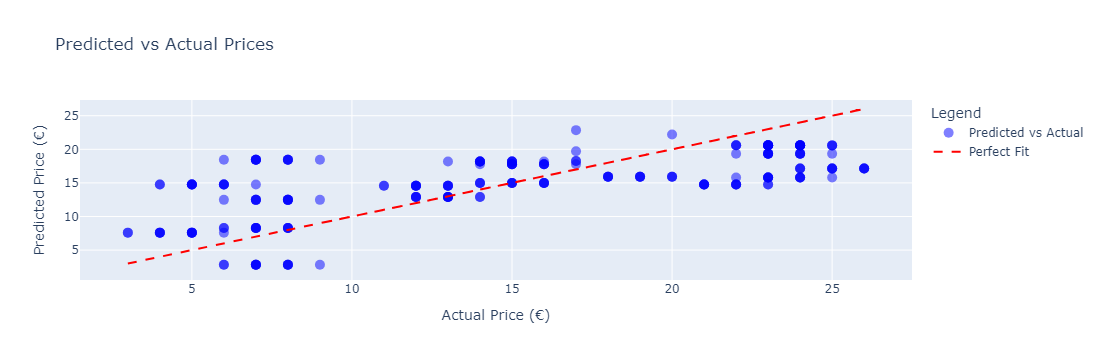

In [3]:
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objects as go

# Load the data from the Excel file
df = pd.read_excel('in_depth_analysis.xlsx')

# Select the dependent variable (Price) and independent variables
X = df[['Size', 'WG Type', 'Price', 'Health Centers Proximity', 'Low-crime Areas Proximity',
        'Berlin Hauptbahnhof Proximity', 'Berlin Brandenburg Airport Proximity', 'Cinemas Proximity']]
y = df['Online Duration']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Predict the prices using the fitted model
predictions = model.predict(X)

# Create a scatter plot using Plotly
fig = go.Figure()

# Add actual prices scatter plot
fig.add_trace(go.Scatter(x=y, y=predictions, mode='markers', name='Predicted vs Actual',
                         marker=dict(color='blue', size=10, opacity=0.5),
                         hoverinfo='text',
                         hovertext=[f'Actual: {a}, Predicted: {p:.2f}' for a, p in zip(y, predictions)]))

# Add line for perfect fit
fig.add_trace(go.Scatter(x=y, y=y, mode='lines', name='Perfect Fit',
                         line=dict(color='red', width=2, dash='dash')))

# Set plot layout
fig.update_layout(title='Predicted vs Actual Prices',
                  xaxis_title='Actual Price (€)',
                  yaxis_title='Predicted Price (€)',
                  legend_title='Legend')

# Show the figure
fig.show()